In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from rpca import rpca_PCP
from improve_rpca import improve_rpca, improve_rpca_hyperparams
from noisy_rpca import noisy_rpca, noisy_rpca_hyperparams

**Generate low rank synthetic data**

In [4]:
N = 40
num_groups = 3
num_values_per_group = 10
p_missing = 0.2

Ds = []
for k in range(num_groups):
    d = np.ones((N, num_values_per_group)) * (k + 1) * 10
    Ds.append(d)

D = np.hstack(Ds)

# decimate x% of data 
n1, n2 = D.shape
S = np.random.rand(n1, n2)
D[S < 0.1] = 0

# create signal
list_D = D.flatten().tolist()[:-4]

**RPCA**

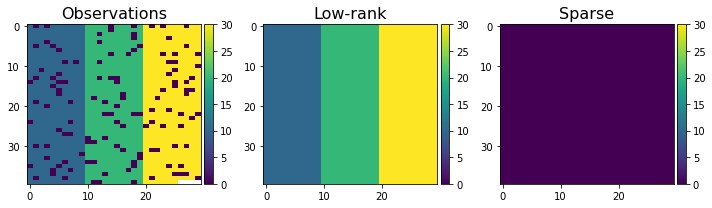

In [6]:
rpca = rpca_PCP(signal=list_D, period=n2)
rpca.prepare_data()
rpca.compute_rpca_PCP()
rpca.plot_matrices()
rpca.plot_signal()

**improve PCA**

In [ ]:
hp = improve_rpca_hyperparams(signal=list_D, period=n2, list_periods=[1, 5])
hp.add_hyperparams(hyperparams_lam=[0.1, 1], hyperparams_etas=[[0.1, 1], [0.1, 1]])
hp.prepare_data()
hp.compute_improve_rpca_hyperparams()
hp.plot_matrices()
#hp.plot_signal()

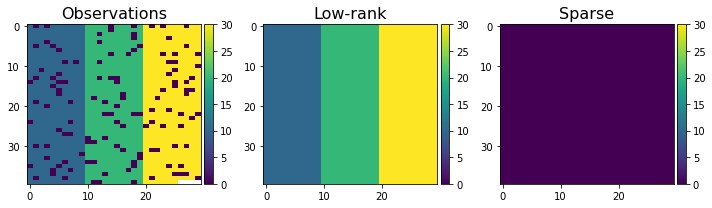

In [10]:
irpca = improve_rpca(signal=list_D, period=n2, lam=0.12, list_periods=[1], list_etas=[0.8])
irpca.prepare_data()
irpca.compute_improve_rpca()
irpca.plot_matrices()
irpca.plot_signal()

**noisy RPCA**

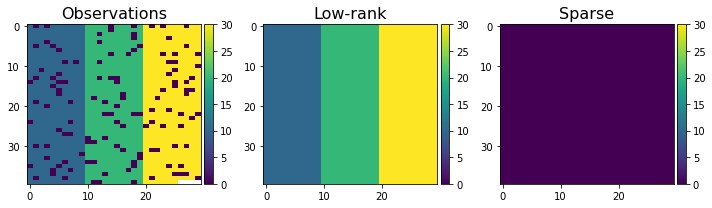

In [11]:
nrpca = noisy_rpca(D=D, period=n2, lam=0.01, tau=0.1)#, list_periods=[1], list_etas=[0.1])
#nrpca.prepare_data()
nrpca.compute_noisy_rpca()
rpca.plot_matrices()
# rpca.plot_signal()